### MACHINE LEARNING 
### NAME: KSHITIJ CHILATE
### DATE: 28/12/2025

Aim: Implement K-Nearest Neighbor (KNN) Algorithm for Regression & Classification problems.
The K-Nearest Neighbor (KNN) algorithm is a simple, yet powerful, supervised learning algorithm that can be
used for both classification and regression. The basic idea is that a data point is classified by a majority vote of
its neighbors, with the data point being assigned to the class most common among its k nearest neighbors
(where k is a small positive integer).
Steps of the KNN Classification Algorithm:
Choose the number of neighbors (k), Calculate the distance between the test data and all the training data. Sort
the distances and determine the nearest neighbours based on the k-th minimum distance. Assign the class label
to the test data based on most nearest neighbors.
Steps of the KNN Regression Algorithm:
between the test data point and all the training data points. and select the k nearest neighbors. of the target
values of the k nearest neighbors to predict the target value for the new data point.
Dataset:
1) For Regression: Consider following dataset for k-Nearset Neighbors Regression. Regression.csv dataset
In the above dataset, we have 15 data points. The dataset contains the length and weight of metal rods along
with their cost. Now, suppose that we want to calculate the cost for a rod with a length of 7 and a weight of 8.
Select k =3, The new datapoint is (7, 8), Length= 7, Weight= 8, find the cost using k-NN Algorithm.
2)For Classification: i) Iris flower dataset and ii) Pima India Diabetes Dataset.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error,f1_score,accuracy_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder

In [28]:
df_reg=pd.read_csv('Regression.csv')
df_classification_iris=pd.read_csv('Iris.csv')
df_classification_diabetes=pd.read_csv('Pima_India_Diabetes.csv')

In [29]:
df_reg

,Length,Weight,Cost (Target)
0,10,15,45
1,11,6,37
2,12,14,48
3,7,9,33
4,9,14,38
5,8,12,40
6,6,11,35
7,15,10,50
8,14,8,46
9,7,12,35


In [30]:
X=df_reg[['Length','Weight']]
y=df_reg[['Cost (Target)']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
knn_reg=KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [32]:
y_pred=knn_reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Squared Error:',rmse)
print('Root Mean Squared Error:',rmse)
print('Mean Squared Error:',mse)
print('R2 Score:',r2)

Mean Squared Error: 1.7427096823731247
Root Mean Squared Error: 1.7427096823731247
Mean Squared Error: 3.0370370370370376
R2 Score: 0.8498168498168498


In [33]:
mse_values=[]
r2_values=[]
rmse_values=[]
mae_values=[]
k_values=[]
for i in range (1,8):
  knn_reg=KNeighborsRegressor(n_neighbors=i)
  knn_reg.fit(X_train,y_train)
  y_pred=knn_reg.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  rmse=root_mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  mse_values.append(mse)
  r2_values.append(r2)
  rmse_values.append(rmse)
  mae_values.append(mae)
  k_values.append(i)


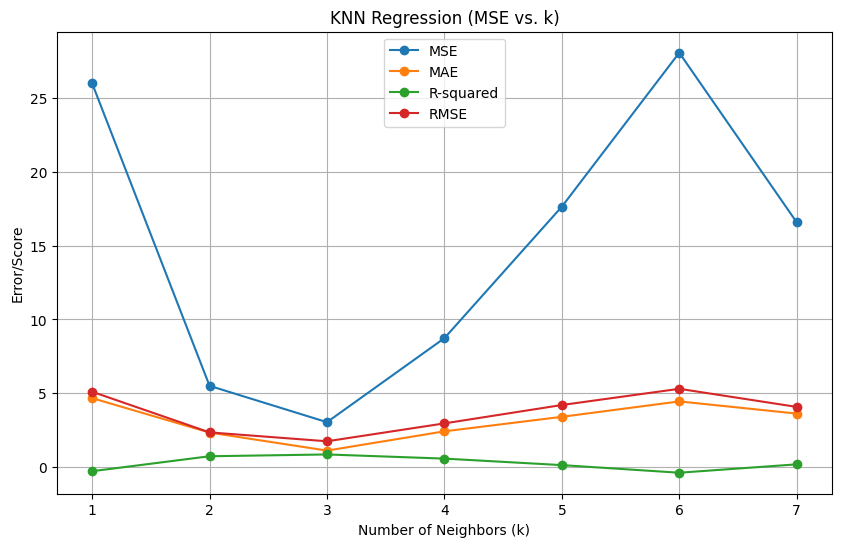

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', label='MSE')
plt.plot(k_values, mae_values, marker='o', label='MAE')
plt.plot(k_values, r2_values, marker='o', label='R-squared')
plt.plot(k_values, rmse_values, marker='o', label='RMSE')
plt.title('KNN Regression (MSE vs. k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error/Score')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

### KNN Classifiaction: Diabities

In [35]:
df_classification_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
df_classification_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
df_classification_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


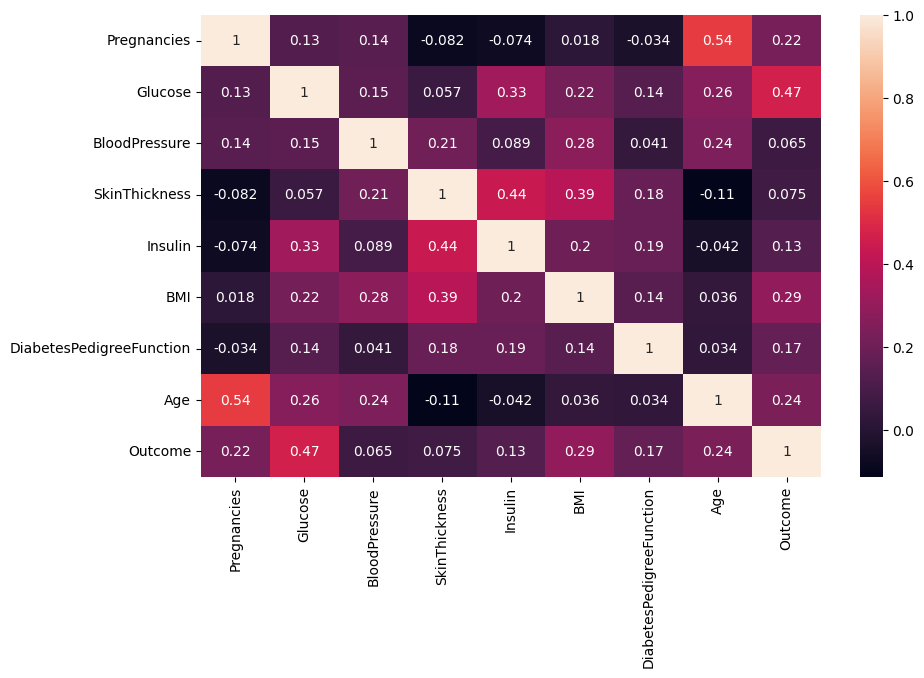

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df_classification_diabetes.corr(),annot=True)
plt.show()

In [39]:
X1=df_classification_diabetes.drop(['Outcome','SkinThickness','Insulin','DiabetesPedigreeFunction'],axis=1)
y1=df_classification_diabetes['Outcome']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.195,random_state=42)

In [40]:
knn_class = KNeighborsClassifier(n_neighbors=17)
knn_class.fit(X1_train, y1_train)
y1_pridect = knn_class.predict(X1_test)
accuracy_scr=accuracy_score(y1_test,y1_pridect)
recall_scr=recall_score(y1_test,y1_pridect)
precision_scr=precision_score(y1_test,y1_pridect)
f1_scr=f1_score(y1_test,y1_pridect)
print('Accuracy Score:',accuracy_scr)
print('Recall Score:',recall_scr)
print('Precision Score:',precision_scr)
print('F1 Score:',f1_scr)

Accuracy Score: 0.7866666666666666
Recall Score: 0.6481481481481481
Precision Score: 0.7291666666666666
F1 Score: 0.6862745098039216


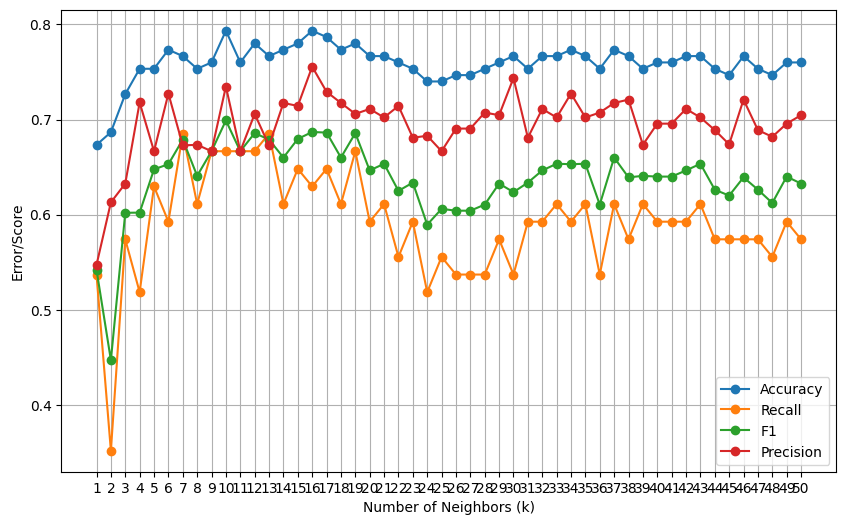

In [41]:
acc_scor = []
rc_score = []
pr_score = []
f1_scores = []
k_values = []
for i in range(1, 51):
  knn_class = KNeighborsClassifier(n_neighbors=i)
  knn_class.fit(X1_train, y1_train)
  y1_pridect = knn_class.predict(X1_test)
  acc_scor.append(accuracy_score(y1_test, y1_pridect))
  rc_score.append(recall_score(y1_test, y1_pridect))
  pr_score.append(precision_score(y1_test, y1_pridect))
  f1_scores.append(f1_score(y1_test, y1_pridect))
  k_values.append(i)
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc_scor, marker='o', label='Accuracy')
plt.plot(k_values, rc_score, marker='o', label='Recall')
plt.plot(k_values, f1_scores, marker='o', label='F1')
plt.plot(k_values, pr_score, marker='o', label='Precision')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error/Score')
plt.grid(True)
plt.xticks(k_values)
plt.legend()
plt.show()

### KNN Classification: iris

In [42]:
df_classification_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
df_classification_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [44]:
df_classification_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
encoder=LabelEncoder()
for i in df_classification_iris.columns:
  if df_classification_iris[i].dtype=='object':
     df_classification_iris[i]=encoder.fit_transform(df_classification_iris[i])
df_classification_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
